In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
f=open('data/application_train.csv')
app_train = pd.read_csv(f)
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [6]:
ext_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
0,1,0.083037,0.262949,0.139376,9461
1,0,0.311267,0.622246,NaN,16765
2,0,NaN,0.555912,0.729567,19046
3,0,NaN,0.650442,NaN,19005
4,0,NaN,0.322738,NaN,19932


In [7]:
ext_data_corrs = ext_data.corr()

In [8]:
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


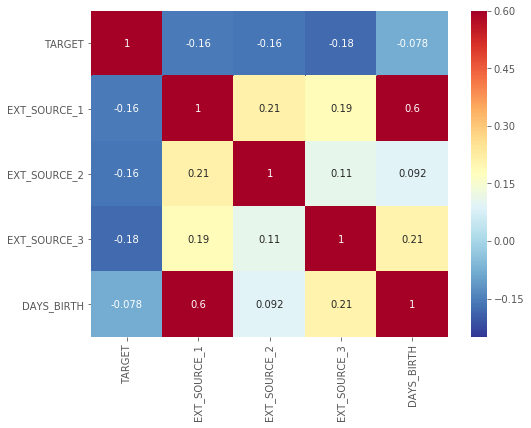

In [10]:
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

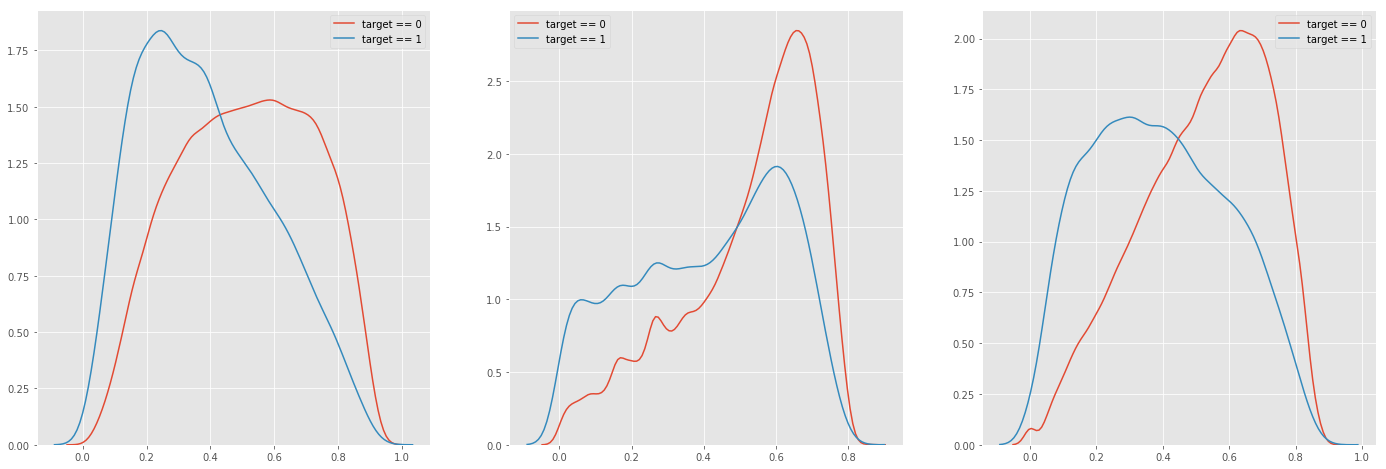

In [12]:
plt.figure(figsize = (24, 8))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

In [13]:
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'],axis = 1, inplace=True)

In [14]:
plot_data.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BIRTH
0,1,0.083037,0.262949,0.139376,25.920548
1,0,0.311267,0.622246,NaN,45.931507
2,0,NaN,0.555912,0.729567,52.180822
3,0,NaN,0.650442,NaN,52.068493
4,0,NaN,0.322738,NaN,54.608219


In [15]:
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

In [16]:
N_sample = 100000
plot_data = plot_data.dropna().sample(n = N_sample)

In [17]:
plot_data.shape

(100000, 5)

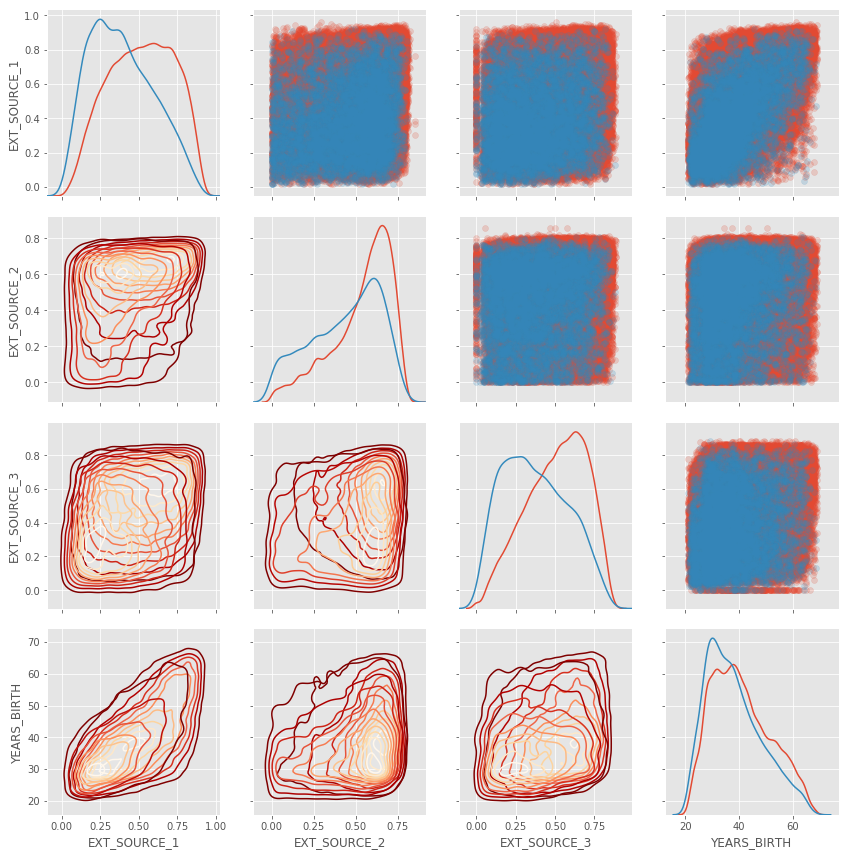

In [19]:
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

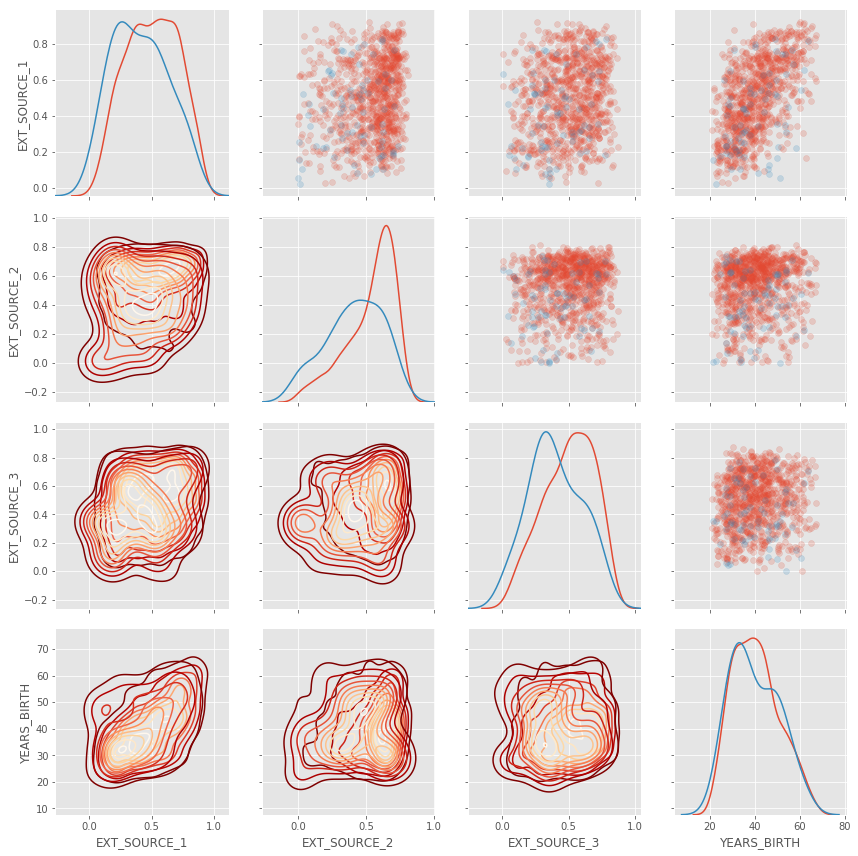

In [20]:
N_sample = 1000
plot_data = plot_data.dropna().sample(n = N_sample)
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

In [25]:
matrix = np.random.random((10,10))*2-1
matrix

array([[-0.3336362 ,  0.76232059,  0.32216925,  0.49830513,  0.62691077,
        -0.14310553, -0.45521886,  0.98511861,  0.74855945, -0.14353337],
       [ 0.13504948,  0.2561064 ,  0.18212043, -0.26460496,  0.6082799 ,
        -0.10050192, -0.57347839,  0.88632903, -0.4491828 ,  0.6110333 ],
       [-0.5897852 ,  0.5110266 , -0.61848545,  0.19455148,  0.70278422,
        -0.80789682, -0.71089045, -0.9080828 ,  0.63108618,  0.39203334],
       [ 0.7659677 , -0.93223359, -0.01934643,  0.00674772, -0.77702361,
        -0.26112228,  0.33251312, -0.72129273, -0.364145  , -0.44641097],
       [-0.03638747, -0.61961608,  0.82865695,  0.17843825, -0.95540154,
        -0.11040437,  0.77524539,  0.63233311, -0.30678398, -0.06106452],
       [ 0.88411183,  0.01838375,  0.17905602, -0.8760258 ,  0.22544005,
         0.97428375,  0.90541446, -0.67722032,  0.36192521,  0.17147167],
       [-0.54876543, -0.88142888,  0.21170842,  0.99909585, -0.28777694,
        -0.32229308, -0.04574308,  0.47360614

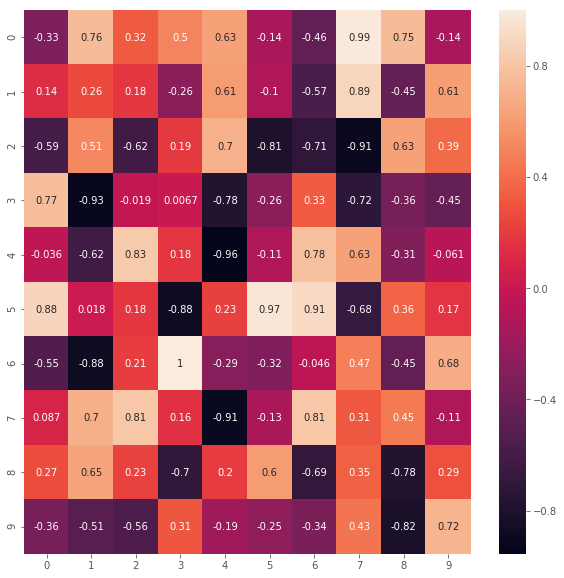

In [26]:
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix,annot=True)

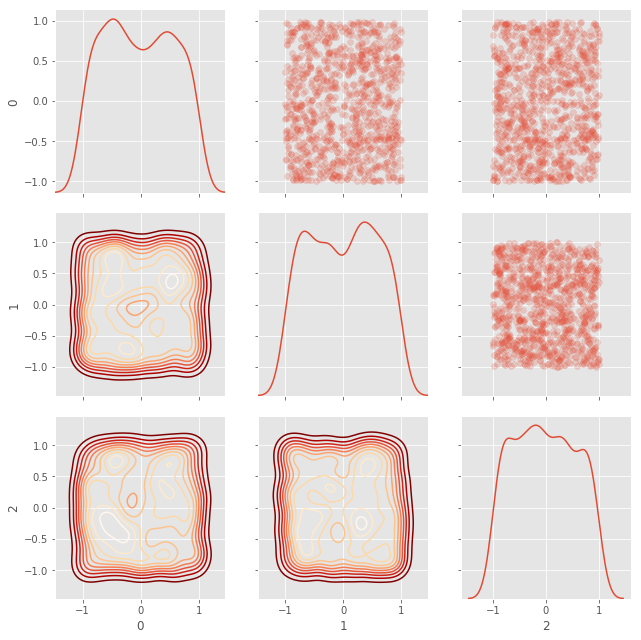

In [34]:

nrow = 1000
ncol = 3

matrix = np.random.random((nrow,ncol))*2-1
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice)
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)


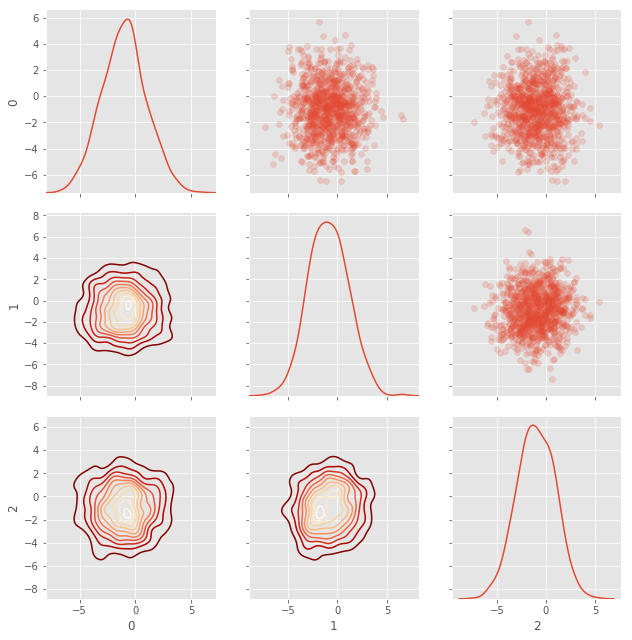

In [35]:

nrow = 1000
ncol = 3

matrix = np.random.randn(nrow,ncol)*2-1

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice)

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()